**Membuat Model NLP menggunakan Tensorflow**

Nama : Astri Widyastiti

Id Dicoding : astriwidyastiti

Email : astriwidyastiti@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Emotion_classify_Data.csv')
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
data.shape

(5937, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


# Membuat Variabel Dummy

In [5]:
category = pd.get_dummies(data.Emotion)
data_baru = pd.concat([data, category], axis=1)
data_baru = data_baru.drop(columns='Emotion')
data_baru

,Comment,anger,fear,joy
0,i seriously hate one subject to death but now ...,0,1,0
1,im so full of life i feel appalled,1,0,0
2,i sit here to write i start to dig out my feel...,0,1,0
3,ive been really angry with r and i feel like a...,0,0,1
4,i feel suspicious if there is no one outside l...,0,1,0
...,...,...,...,...
5932,i begun to feel distressed for you,0,1,0
5933,i left feeling annoyed and angry thinking that...,1,0,0
5934,i were to ever get married i d have everything...,0,0,1
5935,i feel reluctant in applying there because i w...,0,1,0


In [6]:
text = data_baru['Comment'].values
label = data_baru[['anger','fear','joy']].values

In [7]:
text

array(['i seriously hate one subject to death but now i feel reluctant to drop it',
       'im so full of life i feel appalled',
       'i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it',
       ...,
       'i were to ever get married i d have everything ready to offer to him because i ve got it together and when i do go out to clubs even the perfect good looking guys feel intimated after talking to me about my clever self',
       'i feel reluctant in applying there because i want to be able to find a company where i know at least one person',
       'i just wanted to apologize to you because i feel like a heartless bitch'],
      dtype=object)

In [8]:
label

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

# Split Data

In [9]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

# Tokenization

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

pad_train=pad_sequences(sekuens_latih,
padding='post',
maxlen=50,
truncating='post')

pad_test=pad_sequences(sekuens_test,
padding='post',
maxlen=50,
truncating='post')
# pad_train = pad_sequences(sekuens_latih, maxlen=100)
# pad_test = pad_sequences(sekuens_test,  maxlen=100)

# Membuat Model

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000,output_dim=16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Callbacks

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

# Menjalankan Model

In [14]:
num_epochs = 100
history = model.fit(pad_train, label_latih, epochs=num_epochs, batch_size=32,callbacks=[reduce_lr, early_stop],
                    validation_data=(pad_test, label_test),verbose=1)

Epoch 1/100
149/149 [==============================] - 12s 53ms/step - loss: 1.0990 - accuracy: 0.3407 - val_loss: 1.0990 - val_accuracy: 0.3316 - lr: 0.0010
Epoch 2/100
149/149 [==============================] - 5s 33ms/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0997 - val_accuracy: 0.3190 - lr: 0.0010
Epoch 3/100
149/149 [==============================] - 7s 44ms/step - loss: 1.0986 - accuracy: 0.3285 - val_loss: 1.0995 - val_accuracy: 0.3316 - lr: 0.0010
Epoch 4/100
149/149 [==============================] - 7s 44ms/step - loss: 1.0987 - accuracy: 0.3340 - val_loss: 1.0995 - val_accuracy: 0.3316 - lr: 0.0010
Epoch 5/100
149/149 [==============================] - 5s 33ms/step - loss: 1.0985 - accuracy: 0.3342 - val_loss: 1.0999 - val_accuracy: 0.3224 - lr: 0.0010
Epoch 6/100
149/149 [==============================] - 7s 44ms/step - loss: 1.0986 - accuracy: 0.3354 - val_loss: 1.0997 - val_accuracy: 0.3325 - lr: 0.0010
Epoch 7/100
149/149 [==============================] - 7s

In [17]:
loss, accuracy = model.evaluate(pad_test, label_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

38/38 [==============================] - 0s 9ms/step - loss: 0.2842 - accuracy: 0.9192
Loss: 0.28417056798934937
Accuracy: 0.9191918969154358


# Visualisasi Model

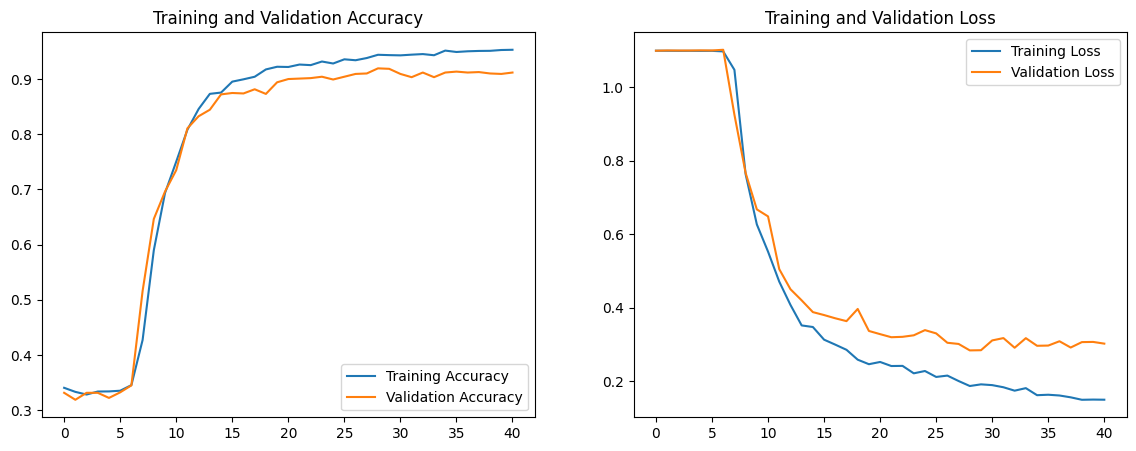

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(41)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()